angle 1.5275555845792539 rad
vortex stiffnes 2.6496853312486065e-05 kg / s^2
non linear vortex stiffnes factor 6.624213328121516e-06 kg/s^2
oersted stiffnes -4.1618579858801627e-16 kg m^2 / A s^2
non linear oersted stiffnes factor 2.0564474753760806e-16 kg m^2 / A s^2
kappa parameter = 2.318495195798953e-05 kg / s^2
Damping = 6.17697491252793e-16 kg / rad s
Gyrovector Magnitude =  6.895636305512096e-14 kg/ rad s
a_j= 8.943959479303133e-17 kg m^2 / A s^2
xhi parameter 0.3562949902878555
thershold current  0.000320140233665133 A
Relaxation time 1.4090843693990357e-07 s
angle 1.5275555845792539 rad
vortex stiffnes 2.6496853312486065e-05 kg / s^2
non linear vortex stiffnes factor 6.624213328121516e-06 kg/s^2
oersted stiffnes -4.1618579858801627e-16 kg m^2 / A s^2
non linear oersted stiffnes factor 2.0564474753760806e-16 kg m^2 / A s^2
kappa parameter = 1.987305060349299e-05 kg / s^2
Damping = 6.17697491252793e-16 kg / rad s
Gyrovector Magnitude =  6.895636305512096e-14 kg/ rad s
a_j= 8.943

C:\Users\paula\AppData\Local\Temp\ipykernel_35516\3848431671.py:165: RuntimeWarning: invalid value encountered in divide
  return (data - np.min(data)) / (np.max(data) - np.min(data))
C:\Users\paula\AppData\Local\Temp\ipykernel_35516\3848431671.py:228: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to fit the plot and legend


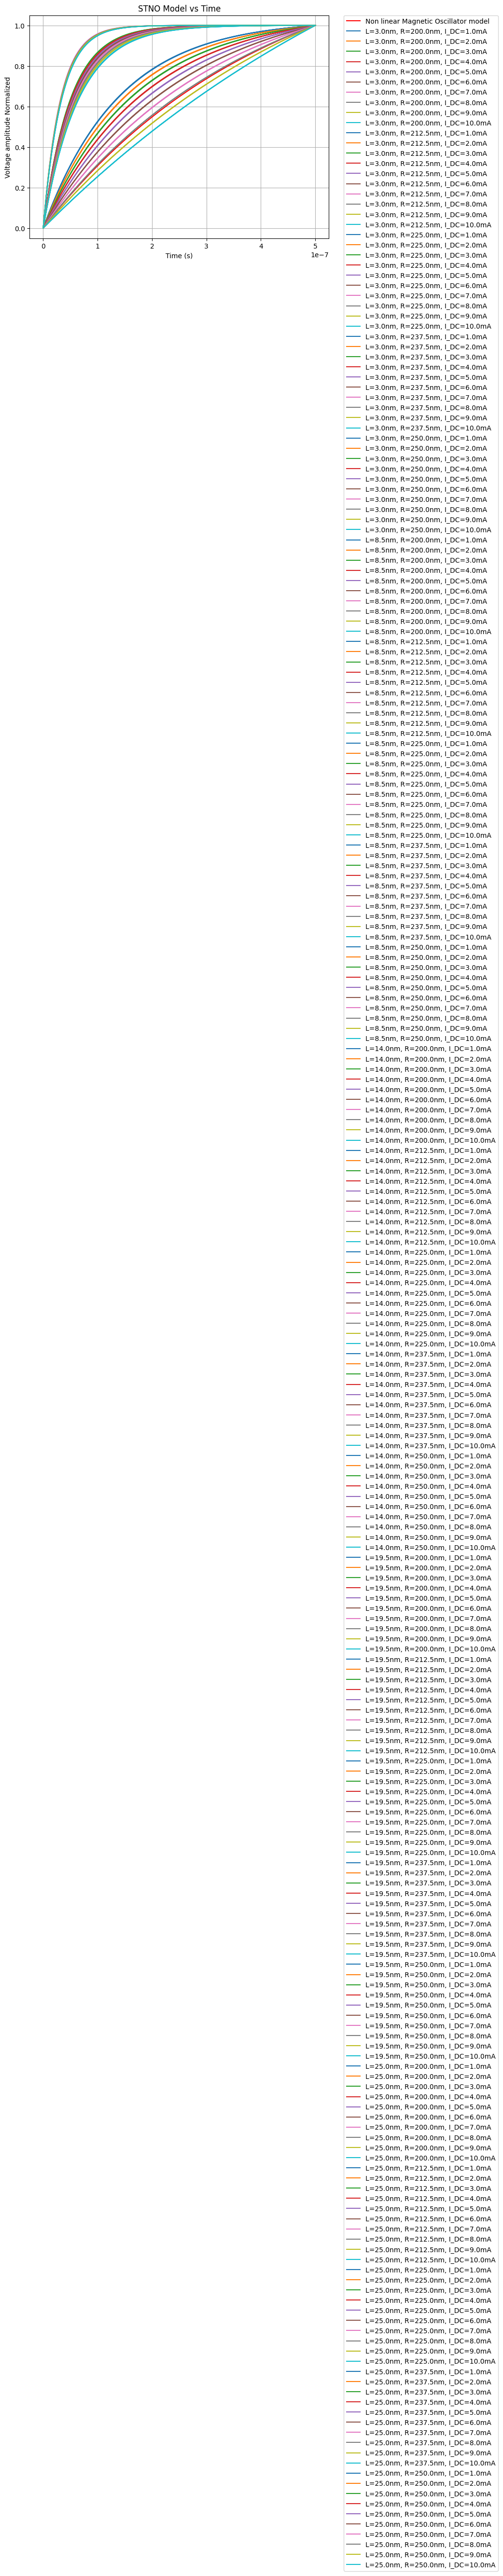

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0
import matplotlib.pyplot as plt
from scipy.constants import e

# non linear magnetic oscillator continous model 


def oscillator_continoum(I_DC,time,v_initial,T_relax,I_c,c):

    if I_DC  < I_c:
        argument = 0
    else: 
        argument = I_DC  - I_c
    
    v_infinity = c * np.sqrt(argument)

    v_osc =  v_infinity * (1 - np.exp(-time/T_relax)) + v_initial * np.exp(-time/T_relax)

    return v_osc



# vortex oscillator continous model 

R_0 = 100 # sample resistance (ohms) ??? a  

R_load = 50 # measurment device resistance (ohms)
R_a_ap = 15 # diference of resistance between paralel and anti-paralel state (ohms)
beta = 0.6 # percentage of core displacement
Aplied_field = 0.2 # perpedicular aplied field (Tesla)
M_s_free = 0.8 # Saturation Magnetization of free Layer (Tesla)
M_s_SAF = 1.2 # Saturation Magnetization of pinned layer (Tesla)

hbar = 6.626e-34
zeta = 2 # zeta parameter (experimental)
Aplied_field = 0.44 # perpedicular aplied field (Tesla)
M_s_free = 6.5e5 # Saturation Magnetization of free Layer (A/m)
M_s_free_tesla = 0.81 # Saturation Magnetization of free Layer (Tesla)
gyro_ratio = 1.7e11 # gyromagnetic ratio (hz/T) ???????
gilbert_cte = 0.01 # gilbert cte
b = 33e-9 # vortex core radius
Chirality = -1
P_spin = 0.5
M_s_SAF = 10.1e5
M_s_SAF_tesla = 1.2

I_DC_Vortex = 0.01


def cte_C(R_0,R_load,R_a_ap,beta,Aplied_field,M_s_free,M_s_SAF,I):
    C = (R_0/(R_0 + R_load))*(
        (I*R_a_ap)/2)*beta*(np.sqrt(((1-(Aplied_field/(4*np.pi*M_s_SAF)))**2)*((1-(Aplied_field/(4*np.pi*M_s_free))))**2))

    return C

def Compute_I_th_and_Relax_time(L,R,I):

    def thetha_0(Aplied_field,M_s_free):   # angle (rad) (correct)
        thetha_0 = np.arccos((Aplied_field)/(4*np.pi*M_s_free))
        return thetha_0

    def k_ms(theta_0,L,R):      # vortex stiffens (kg/s^2) (correct)
        kappa_ms = (10 / 9) * mu_0 * (M_s_free ** 2) * ((L ** 2) / R) * (np.sin(theta_0) ** 2)
        return kappa_ms

    def k_ms_prime(k_ms): 
        k_ms_prime = 0.25 * k_ms
        return k_ms_prime

    def k_oe(L,R,theta_0):
        kappa_oe = 0.85 * Chirality * mu_0 * M_s_free * L * R * np.sin(theta_0)
        return kappa_oe

    def k_oe_prime(L,R,theta_0):
        kappa_oe_prime = -0.42 * Chirality * mu_0 * M_s_free * L * R * np.sin(theta_0)
        return kappa_oe_prime

    def G_parameter(L,M_s_free,theta_0):

        G = 2*np.pi*((L*M_s_free)/gyro_ratio)*(1-np.cos(theta_0))
        return G

    def D_parameter(L,R,theta_0):
        eta = (np.log(R / (2 * b)) - 1 / 4) * (np.sin(theta_0) ** 2)
        D = 2 * np.pi * gilbert_cte * eta * L * M_s_free / gyro_ratio
        return D

    def kappa_parameter(k_ms,k_oe,I,R):            # kappa parameter (kg/s^2)  (correct)
        kappa = k_ms + (k_oe*I)/(np.pi*(R)**2)
        return kappa

    def xhi_parameter(k_ms_prime,k_oe_prime,R,k_ms,k_oe):
        xhi = (k_ms_prime + ((k_oe_prime*I)/(np.pi*(R**2))))/(k_ms+((k_oe*I)/(np.pi*(R**2))))
        return xhi

    def a_j(M_s_SAF,Aplied_field,theta_0):
        p_z = (795774*Aplied_field/(4*np.pi*M_s_SAF))
        a_j = np.pi * ((hbar*P_spin)/(2*e))*p_z * (np.sin(theta_0))**2
        return a_j

    theta_0 =  thetha_0(Aplied_field,M_s_free_tesla)
    print('angle',theta_0,'rad')

    k_ms_value = k_ms(theta_0,L,R)
    print('vortex stiffnes',k_ms_value,'kg / s^2')

    k_ms_prime_value = k_ms_prime(k_ms_value)
    print('non linear vortex stiffnes factor',k_ms_prime_value,'kg/s^2')

    k_oe_value = k_oe(L,R,theta_0)
    print('oersted stiffnes',k_oe_value,'kg m^2 / A s^2')

    k_oe_prime_value = k_oe_prime(L,R,theta_0)
    print('non linear oersted stiffnes factor',k_oe_prime_value,'kg m^2 / A s^2')

    k = kappa_parameter(k_ms_value,k_oe_value,I,R)
    print('kappa parameter =',k,'kg / s^2')

    D = D_parameter(L,R,theta_0)
    print('Damping =',D,'kg / rad s')

    G = G_parameter(L,M_s_free,theta_0)
    print('Gyrovector Magnitude = ',G,'kg/ rad s')

    a_j_value = a_j(M_s_SAF,Aplied_field,theta_0)
    print('a_j=',a_j_value,'kg m^2 / A s^2')

    xhi = xhi_parameter(k_ms_prime_value,k_oe_prime_value,R,k_ms_value,k_oe_value)
    print('xhi parameter' , xhi)

    def threshold_current(D,R,a_j,G,k_ms,k_oe):         
        I_th = (D*k_ms*np.pi*(R**2)/(a_j*G-D*k_oe))
        return I_th

    I_th = threshold_current(D,R,a_j_value,G,k_ms_value,k_oe_value)
    print('thershold current ',I_th,'A')

    def relaxation_time(G,k,D,xhi,zeta):
        tau = (G**2)/((xhi+zeta)*D*k)
        return tau

    T_relax = relaxation_time(G,k,D,xhi,zeta)
    print('Relaxation time',T_relax,'s')

    return T_relax , I_th , xhi , D ,k_oe_value, a_j_value , G


def vortex_oscillator(c,v_initial,T_relax,xhi,I_c,time,I_DC,D,k_oe,a_j,G):
 
    if (I_DC  - I_c ) < 0 :
        argument = 0

    else: 
        argument = (I_DC  - I_c )/((I_c+((D*k_oe)/(a_j*G-D*k_oe))*I_DC)*(zeta+xhi))
    
    v_infinity = c * np.sqrt(argument)
    v_osc =  v_infinity * (1 - np.exp(-time/T_relax)) + v_initial * np.exp(-time/T_relax)

    return v_osc


def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))



# Parámetros 
T_relax_N_L_M_O = 410e-9  # tiempo de relajación (s)
I_DC_N_L_M_O = 7e-3       # corriente continua (A)
I_c_N_L_M_O = 4e-3      # corriente umbral (A)
c_N_L_M_O = 0.2      # constante


# Define parameters again and rerun
L_values = np.linspace(3e-9, 25e-9, 5)  # L values from 3 to 25 nm
R_values = np.linspace(200e-9, 250e-9, 5)  # R values from 100 to 250 nm
I_DC_Vortex_values = np.linspace(1e-3, 10e-3, 10)  # I_DC_Vortex values from 1 to 40 mA



'''
I_DC_Vortex = 0.009
c_vortex = cte_C(R_0,R_load,R_a_ap,beta,Aplied_field,M_s_free_tesla,M_s_SAF_tesla,I=I_DC_Vortex)
T_relax , I_th , xhi = Compute_I_th_and_Relax_time(L=10e-9,R=200e-9,I=I_DC_Vortex)
'''

# Parameters
time = np.linspace(0, 500e-9, 500)  # Time array from 0 to 10 with 500 points
v_initial = 0  # Initial voltage

# Compute oscillator dynamics over time
v_non_linear_magnetic_oscillator = oscillator_continoum(I_DC=7e-3, time=time, v_initial=v_initial,T_relax=410e-9,I_c=4e-3 ,c=0.2  )
v_non_linear_magnetic_oscillator_normalized = normalize(v_non_linear_magnetic_oscillator)



#v_vortex = vortex_oscillator(c=c_vortex,v_initial=v_initial,T_relax=T_relax,xhi=xhi,I_c=I_th,time=time,I_DC=I_DC_Vortex)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(time, v_non_linear_magnetic_oscillator_normalized, label='Non linear Magnetic Oscillator model',color="red")


for L in L_values:
    for R in R_values:
        for I_DC_Vortex in I_DC_Vortex_values:
            c_vortex = cte_C(R_0, R_load, R_a_ap, beta, Aplied_field, M_s_free_tesla, M_s_SAF_tesla, I=I_DC_Vortex)
            T_relax, I_th, xhi , D ,k_oe_value, a_j_value , G = Compute_I_th_and_Relax_time(L=L, R=R, I=I_DC_Vortex)
            v_vortex = vortex_oscillator(c=c_vortex, v_initial=v_initial, T_relax=T_relax, xhi=xhi, I_c=I_th, time=time, I_DC=I_DC_Vortex , D=D,k_oe=k_oe_value,a_j=a_j_value,G=G)
            v_vortex_normalized = normalize(v_vortex)
            label = f'L={L*1e9:.1f}nm, R={R*1e9:.1f}nm, I_DC={I_DC_Vortex*1e3:.1f}mA'
            plt.plot(time, v_vortex_normalized, label=label)


#plt.plot(time, v_vortex, label='Vortex oscillator model')


plt.title('STNO Model vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Voltage amplitude Normalized')
plt.grid(True)

# Create scrollable legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1)

plt.tight_layout()  # Adjust layout to fit the plot and legend


plt.show()

In [32]:
I_DC_Vortex = 0.009
L = 10e-9
R = 200e-9
Compute_I_th_and_Relax_time(L=L, R=R, I=I_DC_Vortex)

angle 1.5275555845792539 rad
vortex stiffnes 0.00029440948124984513 kg / s^2
non linear vortex stiffnes factor 7.360237031246128e-05 kg/s^2
oersted stiffnes -1.3872859952933877e-15 kg m^2 / A s^2
non linear oersted stiffnes factor 6.854824917920267e-16 kg m^2 / A s^2
kappa parameter = 0.00019505244061494902 kg / s^2
Damping = 2.0589916375093098e-15 kg / rad s
Gyrovector Magnitude =  2.298545435170699e-13 kg/ rad s
a_j= 8.943959479303133e-17 kg m^2 / A s^2
xhi parameter 0.6290433334895706
thershold current  0.00325335317466561 A
Relaxation time 5.0038291133505195e-08 s


(5.0038291133505195e-08,
 0.00325335317466561,
 0.6290433334895706,
 2.0589916375093098e-15,
 -1.3872859952933877e-15,
 8.943959479303133e-17,
 2.298545435170699e-13)

angle 1.5275555845792539 rad
vortex stiffnes 1.766456887499071e-05 kg / s^2
non linear vortex stiffnes factor 4.416142218747677e-06 kg/s^2
oersted stiffnes -6.242786978820243e-16 kg m^2 / A s^2
non linear oersted stiffnes factor 3.0846712130641207e-16 kg m^2 / A s^2
kappa parameter = 1.094984342513329e-09 kg / s^2
Damping = 9.09377567823602e-16 kg / rad s
Gyrovector Magnitude =  6.895636305512096e-14 kg/ rad s
a_j= 8.943959479303133e-17 kg m^2 / A s^2
xhi parameter 12003.803037320356
thershold current  0.0006743624922625313 A
Relaxation time 3.9774555490665125e-07 s


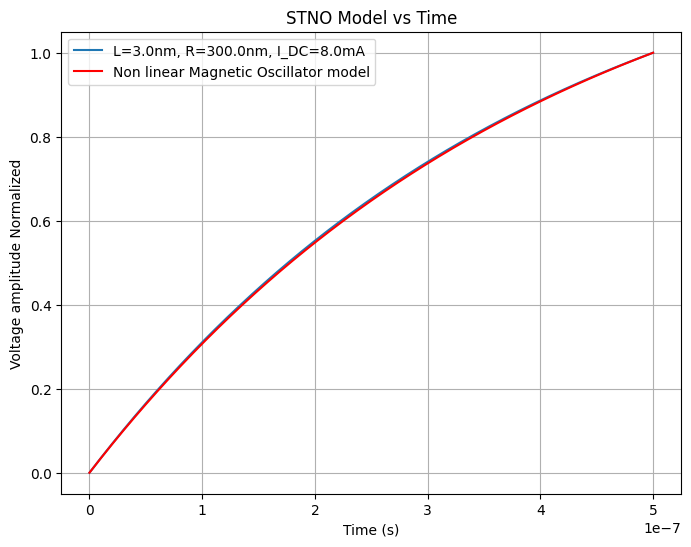

In [34]:

# Parámetros 
T_relax_N_L_M_O = 410e-9  # tiempo de relajación (s)
I_DC_N_L_M_O = 7e-3       # corriente continua (A)
I_c_N_L_M_O = 4e-3      # corriente umbral (A)
c_N_L_M_O = 0.2      # constante


# Define parameters again and rerun
L_values = np.linspace(3e-9, 25e-9, 5)  # L values from 3 to 25 nm
R_values = np.linspace(200e-9, 250e-9, 5)  # R values from 100 to 250 nm
I_DC_Vortex_values = np.linspace(1e-3, 40e-3, 5)  # I_DC_Vortex values from 1 to 40 mA



'''
I_DC_Vortex = 0.009
c_vortex = cte_C(R_0,R_load,R_a_ap,beta,Aplied_field,M_s_free_tesla,M_s_SAF_tesla,I=I_DC_Vortex)
T_relax , I_th , xhi = Compute_I_th_and_Relax_time(L=10e-9,R=200e-9,I=I_DC_Vortex)
'''

# Parameters
time = np.linspace(0, 500e-9, 500)  # Time array from 0 to 10 with 500 points
v_initial = 0  # Initial voltage

# Compute oscillator dynamics over time
v_non_linear_magnetic_oscillator = oscillator_continoum(I_DC=7e-3, time=time, v_initial=v_initial,T_relax=410e-9,I_c=4e-3 ,c=0.2  )
v_non_linear_magnetic_oscillator_normalized = normalize(v_non_linear_magnetic_oscillator)

L= 3e-9
R= 300e-9
I_DC_Vortex = 0.008

#v_vortex = vortex_oscillator(c=c_vortex,v_initial=v_initial,T_relax=T_relax,xhi=xhi,I_c=I_th,time=time,I_DC=I_DC_Vortex)
c_vortex = cte_C(R_0, R_load, R_a_ap, beta, Aplied_field, M_s_free_tesla, M_s_SAF_tesla, I=I_DC_Vortex)
T_relax, I_th, xhi , D ,k_oe_value, a_j_value , G = Compute_I_th_and_Relax_time(L=L, R=R, I=I_DC_Vortex)
v_vortex = vortex_oscillator(c=c_vortex, v_initial=v_initial, T_relax=T_relax, xhi=xhi, I_c=I_th, time=time, I_DC=I_DC_Vortex , D=D,k_oe=k_oe_value,a_j=a_j_value,G=G)
v_vortex_normalized = normalize(v_vortex)


# Plotting
plt.figure(figsize=(8, 6))


label = f'L={L*1e9:.1f}nm, R={R*1e9:.1f}nm, I_DC={I_DC_Vortex*1e3:.1f}mA'
plt.plot(time, v_vortex_normalized, label=label)

plt.plot(time, v_non_linear_magnetic_oscillator_normalized, label='Non linear Magnetic Oscillator model',color="red")
#plt.plot(time, v_vortex, label='Vortex oscillator model')


plt.title('STNO Model vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Voltage amplitude Normalized')
plt.grid(True)



plt.legend()
plt.show()

angle 1.5275555845792539 rad
vortex stiffnes 1.766456887499071e-05 kg / s^2
non linear vortex stiffnes factor 4.416142218747677e-06 kg/s^2
oersted stiffnes -6.242786978820243e-16 kg m^2 / A s^2
non linear oersted stiffnes factor 3.0846712130641207e-16 kg m^2 / A s^2
kappa parameter = 1.094984342513329e-09 kg / s^2
Damping = 9.09377567823602e-16 kg / rad s
Gyrovector Magnitude =  6.895636305512096e-14 kg/ rad s
a_j= 8.943959479303133e-17 kg m^2 / A s^2
xhi parameter 12003.803037320356
thershold current  0.0006743624922625313 A
Relaxation time 3.9774555490665125e-07 s


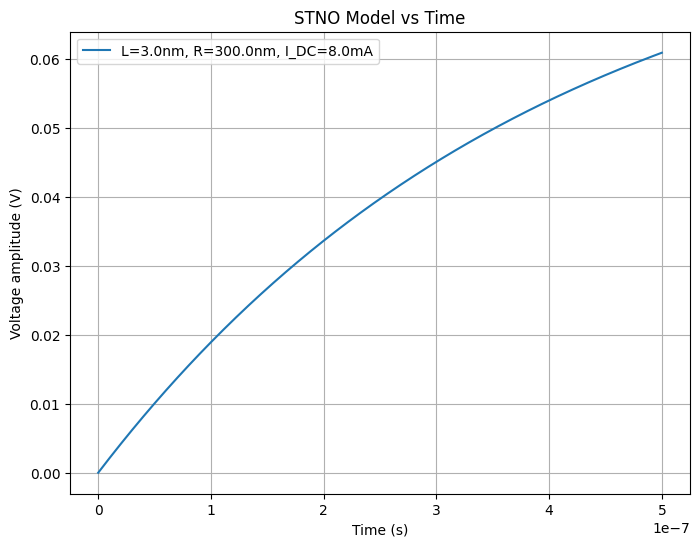

In [50]:
import numpy as np

# Parámetros 
T_relax_N_L_M_O = 410e-9  # tiempo de relajación (s)
I_DC_N_L_M_O = 7e-3       # corriente continua (A)
I_c_N_L_M_O = 4e-3      # corriente umbral (A)

c_N_L_M_O = 0.2     # constante


# Define parameters again and rerun
L_values = np.linspace(3e-9, 25e-9, 5)  # L values from 3 to 25 nm
R_values = np.linspace(200e-9, 250e-9, 5)  # R values from 100 to 250 nm
I_DC_Vortex_values = np.linspace(1e-3, 40e-3, 5)  # I_DC_Vortex values from 1 to 40 mA



'''
I_DC_Vortex = 0.009
c_vortex = cte_C(R_0,R_load,R_a_ap,beta,Aplied_field,M_s_free_tesla,M_s_SAF_tesla,I=I_DC_Vortex)
T_relax , I_th , xhi = Compute_I_th_and_Relax_time(L=10e-9,R=200e-9,I=I_DC_Vortex)
'''

# Parameters
time = np.linspace(0, 500e-9, 500)  # Time array from 0 to 10 with 500 points
v_initial = 0  # Initial voltage

# Compute oscillator dynamics over time
v_non_linear_magnetic_oscillator = oscillator_continoum(I_DC=7e-3, time=time, v_initial=v_initial,T_relax=410e-9,I_c=4e-3 ,c=c_N_L_M_O  )


L= 3e-9
R= 300e-9
I_DC_Vortex = 0.008

#v_vortex = vortex_oscillator(c=c_vortex,v_initial=v_initial,T_relax=T_relax,xhi=xhi,I_c=I_th,time=time,I_DC=I_DC_Vortex)
c_vortex = cte_C(R_0, R_load, R_a_ap, beta, Aplied_field, M_s_free_tesla, M_s_SAF_tesla, I=I_DC_Vortex)
T_relax, I_th, xhi , D ,k_oe_value, a_j_value , G = Compute_I_th_and_Relax_time(L=L, R=R, I=I_DC_Vortex)
v_vortex = vortex_oscillator(c=c_vortex, v_initial=v_initial, T_relax=T_relax, xhi=xhi, I_c=I_th, time=time, I_DC=I_DC_Vortex , D=D,k_oe=k_oe_value,a_j=a_j_value,G=G)



# Plotting
plt.figure(figsize=(8, 6))



label = f'L={L*1e9:.1f}nm, R={R*1e9:.1f}nm, I_DC={I_DC_Vortex*1e3:.1f}mA'
#plt.plot(time, v_vortex, label=label)

#plt.plot(time, v_non_linear_magnetic_oscillator, label='Non linear Magnetic Oscillator model',color="red")
plt.plot(time, v_vortex, label=label)


plt.title('STNO Model vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Voltage amplitude (V)')
plt.grid(True)

plt.legend()


plt.show()

angle 1.5275555845792539 rad
vortex stiffnes 1.766456887499071e-05 kg / s^2
non linear vortex stiffnes factor 4.416142218747677e-06 kg/s^2
oersted stiffnes -6.242786978820243e-16 kg m^2 / A s^2
non linear oersted stiffnes factor 3.0846712130641207e-16 kg m^2 / A s^2
kappa parameter = 1.094984342513329e-09 kg / s^2
Damping = 9.09377567823602e-16 kg / rad s
Gyrovector Magnitude =  6.895636305512096e-14 kg/ rad s
a_j= 8.943959479303133e-17 kg m^2 / A s^2
xhi parameter 12003.803037320356
thershold current  0.0006743624922625313 A
Relaxation time 3.9774555490665125e-07 s


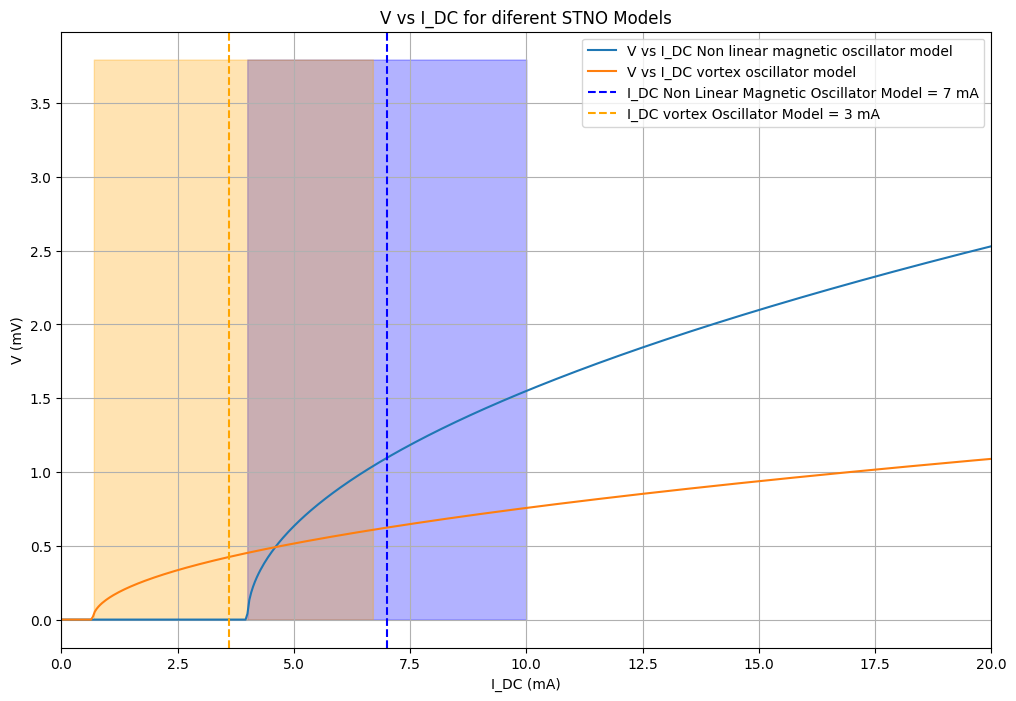

In [5]:

# Definir la función para calcular v_infinity 
def v_vs_I_DC_magnetic_oscillator(c,I_DC, I_c):
    # Comprobar que el argumento de la raíz cuadrada sea positivo
    if  I_DC  < I_c:
        argument = 0
    else : 
        argument = I_DC - I_c
    return c * np.sqrt(argument)

def v_vs_I_DC_vortex_oscillator(I_DC,I_c,zeta,xhi,c,D,k_oe,a_j,G):

    epsilon = 1e-20  # Este valor puede ajustarse según tu caso específico

    if (I_DC  - I_c ) < 0 :
        argument = 0

    else: 
        lol = (a_j*G)-(D*k_oe)
        lol = max(lol, epsilon)
        argument = (I_DC  - I_c )/((I_c+((D*k_oe)/(lol))*I_DC)*(zeta+xhi))
    
    v_infinity = c * np.sqrt(argument)

    return v_infinity


# parámetros non linear oscillator model 
c = 0.02 
I_c = 4e-3  # Corriente umbral (A)
I_DC = 7-3  # I_DC 

# parametros vortex oscillator model 
zeta=2
L= 3e-9
R= 300e-9
I_DC_Vortex = 0.008
#v_vortex = vortex_oscillator(c=c_vortex,v_initial=v_initial,T_relax=T_relax,xhi=xhi,I_c=I_th,time=time,I_DC=I_DC_Vortex)
c_vortex = cte_C(R_0, R_load, R_a_ap, beta, Aplied_field, M_s_free_tesla, M_s_SAF_tesla, I=I_DC_Vortex)
T_relax, I_th, xhi , D ,k_oe_value, a_j_value , G = Compute_I_th_and_Relax_time(L=L, R=R, I=I_DC_Vortex)



# Crear un rango de valores para I_DC
I_DC_range = np.linspace(0, 40e-3, 1000)  

# Calcular v_infinity para cada valor de I_DC 
v_values_vs_I_DC = [v_vs_I_DC_magnetic_oscillator(c,x, I_c) for x in I_DC_range]
v_values_vs_I_DC_mV = np.array(v_values_vs_I_DC) * 1e3  # Convertir a mV

v_vortex_vs_I_DC = [v_vs_I_DC_vortex_oscillator(x,I_th,zeta,xhi,c_vortex,D=D,k_oe=k_oe_value,a_j=a_j_value,G=G) for x in I_DC_range]
v_vortex_vs_I_DC_mV = np.array(v_vortex_vs_I_DC) * 1e3  # Convertir a mV

I_DC_range_mA = I_DC_range * 1e3  # Convertir a mA


plt.figure(figsize=(12, 8))

plt.plot(I_DC_range_mA, v_values_vs_I_DC_mV, label='V vs I_DC Non linear magnetic oscillator model')
plt.plot(I_DC_range_mA, v_vortex_vs_I_DC_mV, label='V vs I_DC vortex oscillator model')

# Añadir una línea recta en I_DC = 8 mA
plt.axvline(x=7, color='blue', linestyle='--', label='I_DC Non Linear Magnetic Oscillator Model = 7 mA')
# Colorear área 
plt.fill_betweenx(v_values_vs_I_DC_mV, 4, 10, color='blue', alpha=0.3)


# Añadir una línea recta en I_DC = 8 mA
plt.axvline(x=3.6, color='orange', linestyle='--', label='I_DC vortex Oscillator Model = 3 mA')
# Colorear área 
plt.fill_betweenx(v_values_vs_I_DC_mV, 0.7, 6.7, color='orange', alpha=0.3)

# Configuración del gráfico
plt.xlabel('I_DC (mA)')
plt.ylabel('V (mV)')
plt.title('V vs I_DC for diferent STNO Models')
plt.legend()
plt.xlim(0,20)
plt.grid(True)
plt.show()


# Training Neural Network


In [107]:
import pickle

# Cargar el subconjunto de datos de entrenamiento
pickle_file_path_train = r'Pickle data\Preprocesed_data_train.pickle'
with open(pickle_file_path_train, 'rb') as file:
    X_train = pickle.load(file)

print("Datos de entrenamiento cargados correctamente")

# Cargar el subconjunto de datos de prueba
pickle_file_path_test = r'Pickle data\Preprocesed_data_test.pickle'
with open(pickle_file_path_test, 'rb') as file:
    X_test = pickle.load(file)

print("Datos de prueba cargados correctamente")


Datos de entrenamiento cargados correctamente
Datos de prueba cargados correctamente


In [108]:

def masking(num_canales, num_neuronas, array_n0_ntau,random_matrix, duracion_ns=100, Delta_t=5e-9, plot=False):

    #array aleatorio binario
    array_aleatorio_binario = random_matrix

    # Realiza el producto
    procesed_input = array_n0_ntau @ array_aleatorio_binario

    # Aplanar el array resultante
    flattened_data = procesed_input.reshape(-1)

    # Calcular la cantidad de pasos a repetir cada valor para mantenerlo durante el periodo especificado
    pasos_por_valor = int((duracion_ns * 1e-9) / Delta_t)

    # Extender cada valor en el array durante el periodo especificado
    valores_extendidos = np.repeat(flattened_data, pasos_por_valor)

    # Crear un array de tiempo basado en la escala de tiempo y la duración
    tiempo = np.arange(len(valores_extendidos)) * Delta_t * 1e9  # Convertir a nanosegundos

    # Graficar
    if plot:
        plt.figure(figsize=(15, 5))
        plt.plot(tiempo, valores_extendidos, linestyle='-', color='purple')
        plt.title('Masking Preprocesed Input')
        plt.xlabel('Tiempo (ns)')
        plt.ylabel('Valor')
        
        plt.grid(True)
        plt.show()

    return valores_extendidos


import time
import numpy as np


num_canales = 13
num_neuronas = 1000
random_matrix = np.random.choice([0, 1], size=(num_canales, num_neuronas))

masked_input_train = []

total_processing_times = 0  # Para calcular el tiempo promedio


for index, data in enumerate(X_train):
    start_time = time.time()  # Tiempo de inicio
    
    array_n0_ntau = data.T
    masked_values = masking(num_canales, num_neuronas, array_n0_ntau, random_matrix=random_matrix,duracion_ns=100,Delta_t=20e-9, plot=False)
    masked_input_train.append(masked_values)
    
    end_time = time.time()  # Tiempo de finalización
    processing_time = end_time - start_time  # Tiempo total de procesamiento
    total_processing_times += processing_time

    # Calcular el tiempo promedio de procesamiento hasta ahora
    average_processing_time = total_processing_times / (index + 1)

    # Estimar el tiempo restante
    remaining_items = len(X_train) - (index + 1)
    estimated_time_remaining = average_processing_time * remaining_items

    # Imprimir la información de procesamiento

    print(f"Dato procesado: {index}, Tiempo de procesamiento: {processing_time:.4f} segundos, "
          f"Tiempo estimado restante: {estimated_time_remaining:.4f} segundos, "
          f"{estimated_time_remaining/60:.4f} minutos")
    

total_processing_times = 0  # Para calcular el tiempo promedio


masked_input_test = []


for index, data in enumerate(X_test):
    start_time = time.time()  # Tiempo de inicio
    
    array_n0_ntau = data.T
    masked_values = masking(num_canales, num_neuronas, array_n0_ntau,random_matrix=random_matrix, duracion_ns=100,Delta_t=20e-9, plot=False)
    masked_input_test.append(masked_values)
    
    end_time = time.time()  # Tiempo de finalización
    processing_time = end_time - start_time  # Tiempo total de procesamiento
    total_processing_times += processing_time

    # Calcular el tiempo promedio de procesamiento hasta ahora
    average_processing_time = total_processing_times / (index + 1)

    # Estimar el tiempo restante
    remaining_items = len(X_test) - (index + 1)
    estimated_time_remaining = average_processing_time * remaining_items

    # Imprimir la información de procesamiento

    print(f"Dato procesado: {index}, Tiempo de procesamiento: {processing_time:.4f} segundos, "
          f"Tiempo estimado restante: {estimated_time_remaining:.4f} segundos, "
          f"{estimated_time_remaining/60:.4f} minutos")


Dato procesado: 0, Tiempo de procesamiento: 0.0020 segundos, Tiempo estimado restante: 3.6179 segundos, 0.0603 minutos
Dato procesado: 1, Tiempo de procesamiento: 0.0020 segundos, Tiempo estimado restante: 3.5960 segundos, 0.0599 minutos
Dato procesado: 2, Tiempo de procesamiento: 0.0010 segundos, Tiempo estimado restante: 3.0064 segundos, 0.0501 minutos
Dato procesado: 3, Tiempo de procesamiento: 0.0010 segundos, Tiempo estimado restante: 2.6935 segundos, 0.0449 minutos
Dato procesado: 4, Tiempo de procesamiento: 0.0010 segundos, Tiempo estimado restante: 2.5196 segundos, 0.0420 minutos
Dato procesado: 5, Tiempo de procesamiento: 0.0010 segundos, Tiempo estimado restante: 2.3932 segundos, 0.0399 minutos
Dato procesado: 6, Tiempo de procesamiento: 0.0010 segundos, Tiempo estimado restante: 2.3096 segundos, 0.0385 minutos
Dato procesado: 7, Tiempo de procesamiento: 0.0011 segundos, Tiempo estimado restante: 2.2589 segundos, 0.0376 minutos
Dato procesado: 8, Tiempo de procesamiento: 0.00

In [109]:
masked_input_train_32 = []

for input_data in masked_input_train:
    input_data = input_data.astype(np.float32)
    masked_input_train_32.append(input_data)

print(masked_input_train_32[1].dtype)

masked_input_test_32 = []

for input_data in masked_input_test:
    input_data = input_data.astype(np.float32)
    masked_input_test_32.append(input_data)

print(masked_input_test_32[1].dtype)

float32
float32


In [110]:
import time
import numpy as np
import matplotlib.pyplot as plt

def scale_to_range(data, global_min , global_max , new_min=-2, new_max=2):
    old_min = global_min
    old_max = global_max
    old_range = old_max - old_min
    normalized_data = (data - old_min) / old_range
    scaled_data = normalized_data * (new_max - new_min) + new_min

    return scaled_data

train_array = np.concatenate(masked_input_train_32)

# Calcula el mínimo y el máximo globales
global_min = np.min(train_array)
global_max = np.max(train_array)

Input_data_train = []

total_processing_times = 0  # Para calcular el tiempo promedio
for index , input in enumerate(masked_input_train_32):

    start_time = time.time()  # Tiempo de inicio

    scaled_time_series = scale_to_range(input,global_min=global_min,global_max=global_max)
    Input_data_train.append(scaled_time_series)

    end_time = time.time()  # Tiempo de finalización
    processing_time = end_time - start_time  # Tiempo total de procesamiento
    total_processing_times += processing_time

    # Calcular el tiempo promedio de procesamiento hasta ahora
    average_processing_time = total_processing_times / (index + 1)

    # Estimar el tiempo restante
    remaining_items = len(masked_input_train_32) - (index + 1)
    estimated_time_remaining = average_processing_time * remaining_items

    # Imprimir la información de procesamiento

    print(f"Dato procesado: {index}, Tiempo de procesamiento: {processing_time:.4f} segundos, "
          f"Tiempo estimado restante: {estimated_time_remaining:.4f} segundos, "
          f"{estimated_time_remaining/60:.4f} minutos")
    
Input_data_test = []

total_processing_times = 0  # Para calcular el tiempo promedio
for index , input in enumerate(masked_input_test_32):

    start_time = time.time()  # Tiempo de inicio

    scaled_time_series = scale_to_range(input,global_min=global_min,global_max=global_max)
    Input_data_test.append(scaled_time_series)

    end_time = time.time()  # Tiempo de finalización
    processing_time = end_time - start_time  # Tiempo total de procesamiento
    total_processing_times += processing_time

    # Calcular el tiempo promedio de procesamiento hasta ahora
    average_processing_time = total_processing_times / (index + 1)

    # Estimar el tiempo restante
    remaining_items = len(masked_input_test_32) - (index + 1)
    estimated_time_remaining = average_processing_time * remaining_items

    # Imprimir la información de procesamiento

    print(f"Dato procesado: {index}, Tiempo de procesamiento: {processing_time:.4f} segundos, "
          f"Tiempo estimado restante: {estimated_time_remaining:.4f} segundos, "
          f"{estimated_time_remaining/60:.4f} minutos")      

Dato procesado: 0, Tiempo de procesamiento: 0.0030 segundos, Tiempo estimado restante: 5.3940 segundos, 0.0899 minutos
Dato procesado: 1, Tiempo de procesamiento: 0.0020 segundos, Tiempo estimado restante: 4.4784 segundos, 0.0746 minutos
Dato procesado: 2, Tiempo de procesamiento: 0.0000 segundos, Tiempo estimado restante: 2.9839 segundos, 0.0497 minutos
Dato procesado: 3, Tiempo de procesamiento: 0.0010 segundos, Tiempo estimado restante: 2.6852 segundos, 0.0448 minutos
Dato procesado: 4, Tiempo de procesamiento: 0.0010 segundos, Tiempo estimado restante: 2.5067 segundos, 0.0418 minutos
Dato procesado: 5, Tiempo de procesamiento: 0.0000 segundos, Tiempo estimado restante: 2.0877 segundos, 0.0348 minutos
Dato procesado: 6, Tiempo de procesamiento: 0.0024 segundos, Tiempo estimado restante: 2.4076 segundos, 0.0401 minutos
Dato procesado: 7, Tiempo de procesamiento: 0.0013 segundos, Tiempo estimado restante: 2.4007 segundos, 0.0400 minutos
Dato procesado: 8, Tiempo de procesamiento: 0.00

In [111]:
import time

L= 3e-9
R= 300e-9
I_DC_Vortex = 0.008
delta_t = 20e-9

c_vortex = cte_C(R_0, R_load, R_a_ap, beta, Aplied_field, M_s_free_tesla, M_s_SAF_tesla, I=I_DC_Vortex)
T_relax, I_th, xhi , D ,k_oe_value, a_j_value , G = Compute_I_th_and_Relax_time(L=L, R=R, I=I_DC_Vortex)


def vortex_oscillator(I_in,I_corr,c,v_initial,T_relax,xhi,I_c,delta_t,I_DC,D,k_oe,a_j,G):
 
    epsilon = 1e-20  # Este valor puede ajustarse según tu caso específico

    if (I_DC + I_in + I_corr  - I_c ) < 0 :
        argument = 0

    else: 
        lol = (a_j*G)-(D*k_oe)
        lol = max(lol, epsilon)
        argument = (I_DC  + I_in + I_corr - I_c )/((I_c+((D*k_oe)/(lol))*I_DC)*(zeta+xhi))
    
    v_infinity = c * np.sqrt(argument)
    v_osc =  v_infinity * (1 - np.exp(-delta_t/T_relax)) + v_initial * np.exp(-delta_t/T_relax)

    return v_osc

def vortex_oscilator_processing(time_series_I_in):
    
    # Inicializar la respuesta del oscilador
    osc_response = []

    # Valor inicial del oscilador 
    v_osc_previous = 0

    # Aplicar la función del oscilador a cada punto de la serie de tiempo
    for I_in in time_series_I_in:
        v_osc = vortex_oscillator(I_in=I_in,I_corr=-4.6e-3,c=c_vortex,v_initial=v_osc_previous,T_relax=T_relax,xhi=xhi,I_c=I_th,delta_t=delta_t,I_DC=I_DC_Vortex,D=D,k_oe=k_oe_value,a_j=a_j_value,G=G)
        osc_response.append(v_osc)
        v_osc_previous = v_osc  # Actualizar el estado anterior para la próxima iteración

    return osc_response

angle 1.5275555845792539 rad
vortex stiffnes 1.766456887499071e-05 kg / s^2
non linear vortex stiffnes factor 4.416142218747677e-06 kg/s^2
oersted stiffnes -6.242786978820243e-16 kg m^2 / A s^2
non linear oersted stiffnes factor 3.0846712130641207e-16 kg m^2 / A s^2
kappa parameter = 1.094984342513329e-09 kg / s^2
Damping = 9.09377567823602e-16 kg / rad s
Gyrovector Magnitude =  6.895636305512096e-14 kg/ rad s
a_j= 8.943959479303133e-17 kg m^2 / A s^2
xhi parameter 12003.803037320356
thershold current  0.0006743624922625313 A
Relaxation time 3.9774555490665125e-07 s


In [112]:
print("len input data:",len(Input_data_train))
for i in range(0,10):
    print(f"example {i}",Input_data_train[i].shape)

len input data: 1800
example 0 (35000,)
example 1 (50000,)
example 2 (35000,)
example 3 (30000,)
example 4 (30000,)
example 5 (30000,)
example 6 (60000,)
example 7 (30000,)
example 8 (30000,)
example 9 (30000,)


In [121]:
import time

reservoir_outputs_train = []
total_processing_times = 0  # Para calcular el tiempo promedio

for index, input_data in enumerate(Input_data_train):
    start_time = time.time()  # Tiempo de inicio

    # Procesar la entrada actual
    output = vortex_oscilator_processing(input_data * 1e-3)

    # Añadir la salida procesada a la lista
    reservoir_outputs_train.append(output)

    end_time = time.time()  # Tiempo de finalización
    processing_time = end_time - start_time  # Tiempo total de procesamiento
    total_processing_times += processing_time

    # Calcular el tiempo promedio de procesamiento hasta ahora
    average_processing_time = total_processing_times / (index + 1)

    # Estimar el tiempo restante
    remaining_items = len(Input_data_train) - (index + 1)
    estimated_time_remaining = average_processing_time * remaining_items

    # Imprimir la información de procesamiento
    print(f"\rDato procesado: {index}, Tiempo de procesamiento: {processing_time:.4f} segundos, Tiempo estimado restante: {estimated_time_remaining:.4f} segundos , {estimated_time_remaining/60:.4f} minutos", end="")


print(f"Número total de salidas procesadas: {len(reservoir_outputs_train)}")

Dato procesado: 55, Tiempo de procesamiento: 0.2262 segundos, Tiempo estimado restante: 404.5641 segundos , 6.7427 minutos

KeyboardInterrupt: 

In [114]:
reservoir_outputs_train_sampled = [output[::5] for output in reservoir_outputs_train]
print("Forma de un elemento muestreado:", len(reservoir_outputs_train_sampled[3]))
reservoir_outputs_train_transformed = [np.array(output).reshape(-1, 1000).T for output in reservoir_outputs_train_sampled]
print("Forma de un elemento transformado en reservoir_outputs_train:", reservoir_outputs_train_transformed[3].shape)


Forma de un elemento muestreado: 6000
Forma de un elemento transformado en reservoir_outputs_train: (1000, 6)


In [115]:
import time

reservoir_outputs_test = []
total_processing_times = 0  # Para calcular el tiempo promedio

for index, input_data in enumerate(Input_data_test):
    start_time = time.time()  # Tiempo de inicio

    # Procesar la entrada actual
    output = vortex_oscilator_processing(input_data * 1e-3)

    # Añadir la salida procesada a la lista
    reservoir_outputs_test.append(output)

    end_time = time.time()  # Tiempo de finalización
    processing_time = end_time - start_time  # Tiempo total de procesamiento
    total_processing_times += processing_time

    # Calcular el tiempo promedio de procesamiento hasta ahora
    average_processing_time = total_processing_times / (index + 1)

    # Estimar el tiempo restante
    remaining_items = len(Input_data_test) - (index + 1)
    estimated_time_remaining = average_processing_time * remaining_items

    # Imprimir la información de procesamiento
    print(f"Dato procesado: {index}, Tiempo de procesamiento: {processing_time:.4f} segundos, Tiempo estimado restante: {estimated_time_remaining:.4f} segundos , {estimated_time_remaining/60:.4f} minutos")


print(f"Número total de salidas procesadas: {len(reservoir_outputs_test)}")

Dato procesado: 0, Tiempo de procesamiento: 0.2598 segundos, Tiempo estimado restante: 51.7059 segundos , 0.8618 minutos
Dato procesado: 1, Tiempo de procesamiento: 0.1550 segundos, Tiempo estimado restante: 41.0726 segundos , 0.6845 minutos
Dato procesado: 2, Tiempo de procesamiento: 0.2110 segundos, Tiempo estimado restante: 41.0962 segundos , 0.6849 minutos
Dato procesado: 3, Tiempo de procesamiento: 0.2526 segundos, Tiempo estimado restante: 43.0417 segundos , 0.7174 minutos
Dato procesado: 4, Tiempo de procesamiento: 0.2224 segundos, Tiempo estimado restante: 42.9302 segundos , 0.7155 minutos
Dato procesado: 5, Tiempo de procesamiento: 0.3093 segundos, Tiempo estimado restante: 45.5933 segundos , 0.7599 minutos
Dato procesado: 6, Tiempo de procesamiento: 0.1934 segundos, Tiempo estimado restante: 44.2098 segundos , 0.7368 minutos
Dato procesado: 7, Tiempo de procesamiento: 0.2519 segundos, Tiempo estimado restante: 44.5298 segundos , 0.7422 minutos
Dato procesado: 8, Tiempo de pro

In [116]:

reservoir_outputs_test_sampled = [output[::5] for output in reservoir_outputs_test]
print("Forma de un elemento muestreado:", len(reservoir_outputs_test_sampled[4]))
reservoir_outputs_test_transformed = [np.array(output).reshape(-1, 1000).T for output in reservoir_outputs_test_sampled]
print("Forma de un elemento transformado en reservoir_outputs_test:", reservoir_outputs_test_transformed[4].shape)




Forma de un elemento muestreado: 8000
Forma de un elemento transformado en reservoir_outputs_test: (1000, 8)


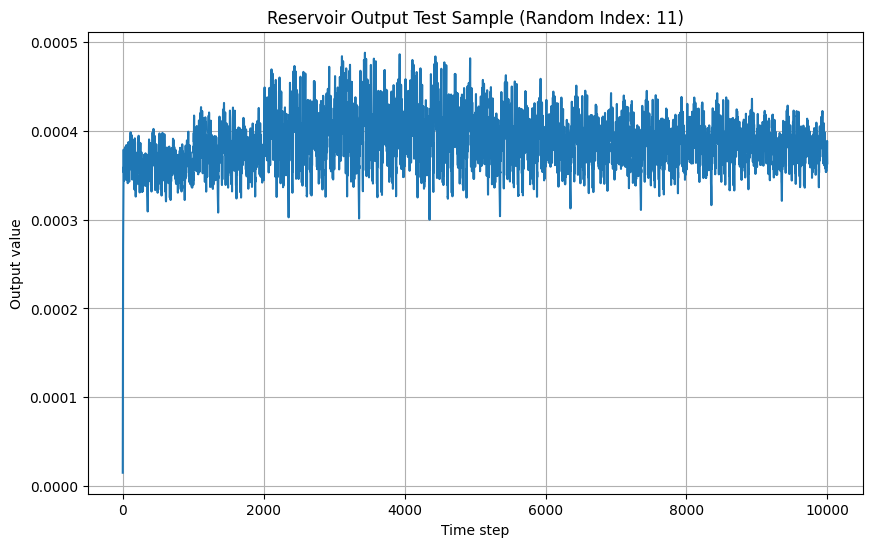

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate a random test sample from the reservoir outputs
random_index = np.random.randint(len(reservoir_outputs_test_sampled))
random_sample = reservoir_outputs_test_sampled[random_index]

# Plot the random reservoir output test sample
plt.figure(figsize=(10, 6))
plt.plot(random_sample)
plt.title(f"Reservoir Output Test Sample (Random Index: {random_index})")
plt.xlabel("Time step")
plt.ylabel("Output value")
plt.grid(True)
plt.show()


In [118]:
# Ruta al archivo pickle
file_path = r'Pickle data\Y_train.pickle'

# Cargar el archivo pickle
with open(file_path, 'rb') as file:
    Y_train = pickle.load(file)


print(Y_train)


# Ruta al archivo pickle
file_path = r'Pickle data\Y_test.pickle'

# Cargar el archivo pickle
with open(file_path, 'rb') as file:
    Y_test = pickle.load(file)


print(Y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [119]:
from sklearn.metrics import accuracy_score

def linear_classifier_readout_variable_length(X_train, y_train, num_features,X_test, y_test):
    
    def create_S_matrix(mfcc_features, num_features=13):

        # Flatten each MFCC feature array and concatenate
        transposed_features = [sequence.T for sequence in mfcc_features]
        S = np.vstack(transposed_features)


        return S

    S = create_S_matrix(X_train)

    def create_Y_hat_repeated(y_train, X_train, num_features):

        # Contar los intervalos en cada secuencia de X_train
        intervals_per_sample = [sequence.shape[1] for sequence in X_train]

        Y_hat_repeated = np.repeat(y_train, intervals_per_sample, axis=0)

        return Y_hat_repeated

    Y_hat_repeated = create_Y_hat_repeated(y_train, X_train, num_features)

    # Calculamos la pseudoinversa 

    S_moore = np.linalg.pinv(S)

    Weights = Y_hat_repeated.T @ S_moore.T

    # Imprimir los resultados
    print('Shapes:')
    print("Forma de la matriz S:", S.shape)
    print("Y_hat_repeated shape:", Y_hat_repeated.shape)
    print("Pseudo inverse shape :",S_moore.shape)
    print('Weights matrix shape', Weights.shape)
    print('Weigths:',Weights)
 
# Aplicamos los pesos al conjunto de prueba
    
    def apply_weights_and_predict(data_set, Weights, num_features):


        # Initialize an empty list to store averaged results for each test sample
        averaged_results = []

        # Apply weights to each test sequence and compute the average result
        for sequence in data_set:

            # Apply weights to the sequence
            interval_results = sequence.T @ Weights.T
      
            # Average the results over all intervals for the test sample
            averaged_results.append(np.mean(interval_results, axis=0))

        # Convert the list of averages to a NumPy array
        averaged_results = np.array(averaged_results)

        # Predict the class for each test sample
        y_test_pred = np.argmax(averaged_results, axis=1)

        return y_test_pred , averaged_results
    
    
    y_test_pred , y_test_promedio = apply_weights_and_predict(X_test, Weights, num_features)
    y_train_pred , y_train_promedio = apply_weights_and_predict(X_train,Weights,num_features)

    # Convertimos las etiquetas verdaderas one-hot en índices de clase
    y_test_true_indices = np.argmax(y_test, axis=1)
    y_train_true_indices = np.argmax(y_train,axis=1)

    
    # Calculamos la precisión
    accuracy_test = accuracy_score(y_test_true_indices, y_test_pred)
    accuracy_train = accuracy_score(y_train_true_indices,y_train_pred)

    print('Shapes for Test Set :')
    print("Mean Results shape:", y_test_promedio.shape)
    print('Predicted Test Labels:')
    print(y_test_pred)
    print('true Test Labels:')
    print( y_test_true_indices)
    print(f'Accuracy en el conjunto de prueba: {accuracy_test*100:.2f} %')

    print('Shapes for train Set :')
    print("Mean Results shape:", y_train_promedio.shape)
    print('Predicted train Labels:')
    print(y_train_pred)
    print(f'Accuracy en el conjunto de entrenamiento: {accuracy_train*100:.2f} %')

    return y_test_pred , y_test_true_indices

num_samples_test = 200
num_samples_train = 1800
num_labels = 10
num_features = 1000

y_test_pred, y_test_true_indices = linear_classifier_readout_variable_length(
reservoir_outputs_train_transformed, Y_train, num_features=num_features , X_test=
reservoir_outputs_test_transformed, y_test=Y_test)

Shapes:
Forma de la matriz S: (13470, 1000)
Y_hat_repeated shape: (13470, 10)
Pseudo inverse shape : (1000, 13470)
Weights matrix shape (10, 1000)
Weigths: [[ 1.76678551e+07  1.38375173e+07  4.16258890e+08 ... -1.27307525e+08
   1.78213880e+08 -1.62303141e+08]
 [ 2.71837669e+07  8.89471425e+07 -9.74612856e+08 ... -3.01677192e+08
   2.34605742e+08 -2.02400442e+07]
 [-3.53427232e+07  3.42340387e+07 -3.68452975e+08 ... -5.28483429e+08
   2.98892357e+08 -1.94703642e+08]
 ...
 [-1.81554597e+08  3.01423538e+08  5.63131676e+08 ...  2.06161168e+08
  -1.19454320e+07  1.80170784e+06]
 [-6.48138427e+06 -1.68472090e+05  9.67007458e+08 ...  8.80429732e+07
   6.29633922e+07 -9.66163617e+07]
 [ 1.95772099e+08 -2.95462627e+08  6.77474858e+07 ... -6.17640446e+08
   3.60451373e+08 -4.15188407e+08]]
Shapes for Test Set :
Mean Results shape: (200, 10)
Predicted Test Labels:
[9 3 4 3 7 7 7 0 2 8 8 6 5 5 2 8 4 5 1 1 7 4 4 7 1 9 9 7 5 7 8 8 2 1 7 5 6
 6 0 2 0 5 6 2 4 3 5 9 6 1 1 1 8 2 4 2 4 9 9 2 1 6 5 3 5 0